<a href="https://colab.research.google.com/github/NivedithaNatarajan/ImageDetection-Keras/blob/main/NivedithaNatarajan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Handwritten Image Detection with Keras using MNIST and Fashion MNIST data

In this exercise we will work with image data: specifically the famous MNIST and Fashion MNIST data sets.  MNIST data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white). Fashion MNIST data set contains 70,000 images of clothing in grayscale (0=black, 255 = white). All the images are 28 pixels by 28 pixels for a total of 784 pixels. 
We will use a Convolutional Neural Network and compare it with a linear neural network. 

In [ ]:
# Preliminaries

from __future__ import print_function

import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, AveragePooling2D
from tensorflow.keras.optimizers import RMSprop
from keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [ ]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
# What is the corresponding label in the training set?
y_train[333]

8

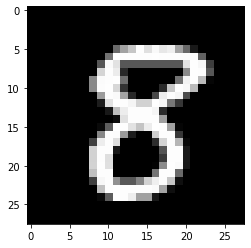

In [ ]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [ ]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [ ]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255

print(x_train.shape,x_test.shape)

(60000, 784) (10000, 784)


In [ ]:
print(y_train.shape)
print(y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]


In [ ]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape,y_test.shape)
#y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

(60000, 10) (10000, 10)


In [ ]:
# We will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# We will use dropout of .5 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.5))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(10, activation='softmax'))

In [ ]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [ ]:
# And now let's fit.

batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 5s 6ms/step - loss: 0.8759 - accuracy: 0.7204 - val_loss: 0.2804 - val_accuracy: 0.9188
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.4791 - accuracy: 0.8609 - val_loss: 0.2315 - val_accuracy: 0.9330
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.4125 - accuracy: 0.8848 - val_loss: 0.2093 - val_accuracy: 0.9416
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.3795 - accuracy: 0.8949 - val_loss: 0.1958 - val_accuracy: 0.9442
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.3574 - accuracy: 0.9024 - val_loss: 0.1898 - val_accuracy: 0.9478
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.3365 - accuracy: 0.9089 - val_loss: 0.1806 - val_accuracy: 0.9524
Epoch 7/30
469/469 [==============================] - 2s 5ms/step - loss: 0.3294 - accuracy: 0.9098 - val_loss: 0.1825 - val_accuracy: 0.9545
Epoch 

In [ ]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1880219727754593
Test accuracy: 0.9606000185012817


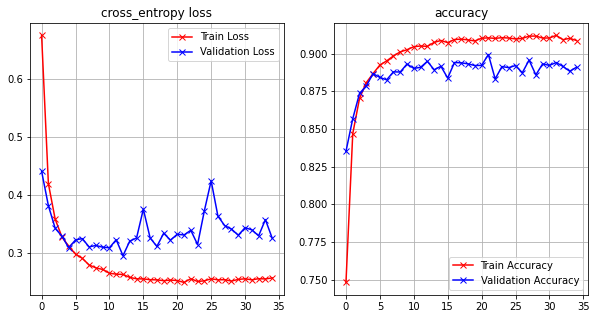

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    
plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

In [ ]:
# Data is currently flattened i.e. m X 784, we need to reshape it back to 28 * 28. To do that we reshape the data.

x_train = np.reshape(x_train, [-1, 28, 28])
x_test = np.reshape(x_test, [-1, 28, 28])
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# LeNet requires input of 32 X 32. So, we will pad the train and test images with zeros to increase the size to 32 X 32.

x_train=np.pad(x_train, ((0,0), (2,2), (2, 2)), 'constant')
x_test=np.pad(x_test, ((0,0), (2,2), (2, 2)), 'constant')
x_train.shape, x_test.shape

((60000, 32, 32), (10000, 32, 32))

In [ ]:
# Convolutional model requires input to be of 3 dimensions. We will add a channel dimension to it.

x_train = np.reshape(x_train, [-1, 32, 32, 1])
x_test = np.reshape(x_test, [-1, 32, 32, 1])
x_train.shape, x_test.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

Write your code below

In [ ]:
model_2 = Sequential()
model_2.add(Conv2D(filters=6, kernel_size=(5,5), strides=1, padding='valid', activation='relu', input_shape=(32, 32, 1)))
model_2.add(MaxPooling2D(pool_size=(2,2),strides=2))
model_2.add(Conv2D(filters=16,kernel_size=(5,5), strides=1, padding='valid', activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2),strides=2))
model_2.add(Flatten())
model_2.add(Dense(units=120, activation='relu'))
model_2.add(Dense(units=84,activation='relu'))
model_2.add(Dense(units=10,activation='softmax'))

In [ ]:
model_2.build()
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [ ]:
# Let's compile the model
learning_rate = 0.001
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case


In [ ]:
print(x_test.shape,y_test.shape)
print(x_train.shape,y_train.shape)

(10000, 32, 32, 1) (10000, 10)
(60000, 32, 32, 1) (60000, 10)


In [ ]:
batch_size = 128  # mini-batch with 128 examples
epochs = 20
history = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 12s 9ms/step - loss: 0.2994 - accuracy: 0.9074 - val_loss: 0.0697 - val_accuracy: 0.9768
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0718 - accuracy: 0.9775 - val_loss: 0.0425 - val_accuracy: 0.9857
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0482 - accuracy: 0.9856 - val_loss: 0.0377 - val_accuracy: 0.9888
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0365 - accuracy: 0.9885 - val_loss: 0.0282 - val_accuracy: 0.9913
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0304 - val_accuracy: 0.9907
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0239 - accuracy: 0.9921 - val_loss: 0.0319 - val_accuracy: 0.9901
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0282 - val_accuracy: 0.9905
Epoch

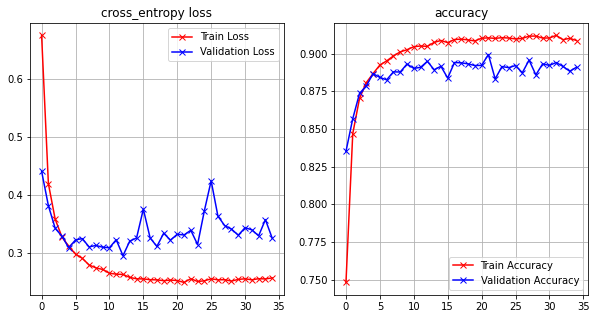

In [ ]:
plot_loss_accuracy(history)

In [ ]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05613116919994354
Test accuracy: 0.989300012588501


# Fashion MNIST
We will do the similar things for Fashion MNIST dataset. Fashion MNIST has 10 categories of clothing items:<br>

| Label | Description | 
| --- | --- | 
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [ ]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
         42,  92,  71, 107,  33,   0,   3,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,  23,
        145,   0,   0,   0, 113,  20,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89,
          8,   0,  10,   0,  36, 104,   0,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  37,  97,
          0,   5,   1,   0,   0, 141,  23,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,  70,  75,
          0,   6,   1,   0,   0, 141,  56,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  85,  57,
          0,   5,   1,   1,   0, 126,  62,   0,   6,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
# What is the corresponding label in the training set?
y_train[333]

8

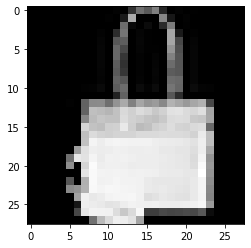

In [ ]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [ ]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [ ]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255

In [ ]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

y_train[333]  

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

## Reperforming the earlier preprocessing methods

In [ ]:
# Data is currently flattened i.e. m X 784, we need to reshape it back to 28 * 28. To do that we reshape the data.

x_train = np.reshape(x_train, [-1, 28, 28])
x_test = np.reshape(x_test, [-1, 28, 28])
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# LeNet requires input of 32 X 32. So, we will pad the train and test images with zeros to increase the size to 32 X 32.

x_train=np.pad(x_train, ((0,0), (2,2), (2, 2)), 'constant')
x_test=np.pad(x_test, ((0,0), (2,2), (2, 2)), 'constant')
x_train.shape, x_test.shape

((60000, 32, 32), (10000, 32, 32))

In [ ]:
# Convolutional model requires input to be of 3 dimensions. We will add a channel dimension to it.

x_train = np.reshape(x_train, [-1, 32, 32, 1])
x_test = np.reshape(x_test, [-1, 32, 32, 1])
x_train.shape, x_test.shape

((60000, 32, 32, 1), (10000, 32, 32, 1))

In [ ]:
model_3 = Sequential()
model_3.add(Conv2D(filters=5, kernel_size=(5,5), padding='valid', activation='relu', input_shape=(32, 32, 1)))
model_3.add(MaxPooling2D(pool_size=(2,2),strides=2))
model_3.add(Conv2D(filters=10,kernel_size=(5,5), padding='valid', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2,2),strides=2))
model_3.add(Flatten())
model_3.add(Dense(units=120, activation='relu'))
model_3.add(Dropout(0.25))
model_3.add(Dense(units=84,activation='relu'))
model_3.add(Dropout(0.25))
model_3.add(Dense(units=10,activation='softmax'))
model_3.build()
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 5)         130       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 5)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 10)        1260      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 10)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 250)               0         
                                                                 
 dense_12 (Dense)            (None, 120)              

In [ ]:
# Let's compile the model
learning_rate = .002
model_3.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

In [ ]:
batch_size =  128
epochs = 35
history = model_3.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/35
469/469 [==============================] - 5s 8ms/step - loss: 0.6750 - accuracy: 0.7481 - val_loss: 0.4404 - val_accuracy: 0.8351
Epoch 2/35
469/469 [==============================] - 4s 8ms/step - loss: 0.4189 - accuracy: 0.8469 - val_loss: 0.3810 - val_accuracy: 0.8568
Epoch 3/35
469/469 [==============================] - 4s 8ms/step - loss: 0.3577 - accuracy: 0.8703 - val_loss: 0.3419 - val_accuracy: 0.8736
Epoch 4/35
469/469 [==============================] - 4s 8ms/step - loss: 0.3269 - accuracy: 0.8808 - val_loss: 0.3282 - val_accuracy: 0.8786
Epoch 5/35
469/469 [==============================] - 4s 8ms/step - loss: 0.3108 - accuracy: 0.8868 - val_loss: 0.3083 - val_accuracy: 0.8867
Epoch 6/35
469/469 [==============================] - 4s 8ms/step - loss: 0.2973 - accuracy: 0.8924 - val_loss: 0.3218 - val_accuracy: 0.8842
Epoch 7/35
469/469 [==============================] - 4s 8ms/step - loss: 0.2900 - accuracy: 0.8952 - val_loss: 0.3241 - val_accuracy: 0.8826
Epoch 

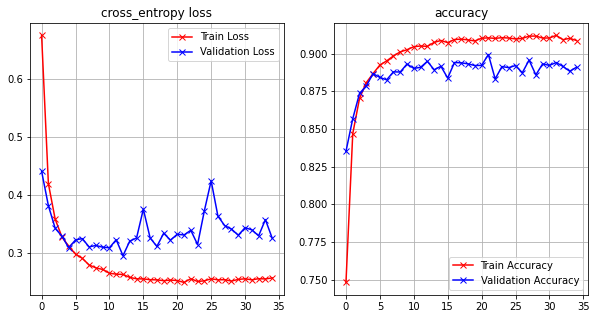

In [ ]:
plot_loss_accuracy(history)

In [ ]:
score = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3248612582683563
Test accuracy: 0.890999972820282
